In [2]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
from gseapy import gseaplot

In [3]:
dataname = 'Wang'  
data = pd.read_csv('../output/'+dataname+'/'+dataname+'_tg.csv',sep=',',index_col=0)
csv = pd.read_csv('../data/'+dataname+'_HIGHPRE_5000.csv',sep=',',index_col=0)
data.columns = csv.columns
data = data.T

In [4]:
all_res = None
for index in range(len(data.iloc[0])):
    data_temp  = data.iloc[:,index]
    pre_res = gp.prerank(rnk=data_temp, # or rnk = rnk,
                     gene_sets='../data/c2.cp.v2024.1.Hs.symbols.gmt', 
                     threads=100,
                     outdir=None, # don't write to disk
                    )
    pre_res.res2d.insert(0,'topic_index',index)
    if index == 0:
        all_res = pre_res.res2d
    else:
        all_res = pd.concat([all_res, pre_res.res2d], ignore_index=True)# all_res.append(pre_res.res2d, ignore_index=True)

2024-11-25 19:52:29,729 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-11-25 19:52:32,074 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-11-25 19:52:34,349 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-11-25 19:52:36,582 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-11-25 19:52:40,981 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-11-25 19:52:45,398 [WARNING] Duplicated values found in preranked stats: 0.04% of genes
The order of those genes will be

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


1402


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


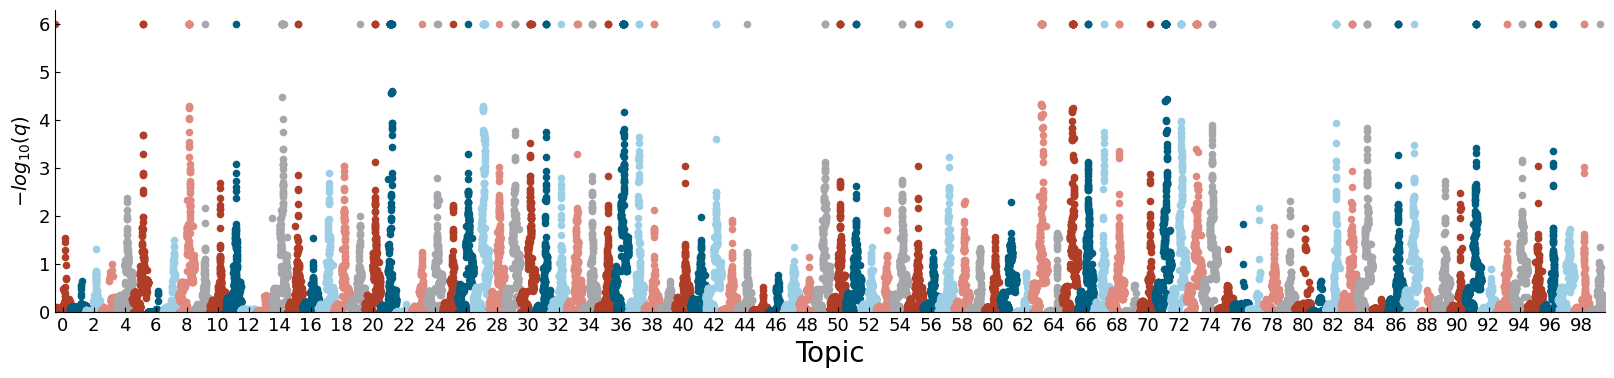

In [7]:
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
'size'   : 20,
}
fonty = {'family' : 'Times New Roman',
'size'   : 14,
}

all_res['$-log_{10}(q)$'] = -np.log10(np.array(all_res['FDR q-val']+1e-6).astype('float'))
all_res = all_res.sort_values('topic_index')

all_res['ind'] = range(len(all_res))
df_grouped = all_res.groupby(('topic_index'))

# manhattan plot
fig = plt.figure(figsize=(20,4),dpi=100) 
ax = fig.add_subplot(111)

#colors = ["#8cc9bb","#818cae","#e8967c","#3a5181","#109781","#4bb0c8","#d94b34"]
colors = ["#b03d26","#005f81","#9ccfe6","#e0897e","#a5a7ab"]
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='$-log_{10}(q)$',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
# add grid
#ax.grid(axis="y",linestyle="--",linewidth=.5,color="gray")
ax.tick_params(direction='in',labelsize=13)
x_labels_2 = []
x_labels_pos_2 = []
for index in range(100):
    if index%2==0:
        x_labels_pos_2.append(x_labels_pos[index])
        x_labels_2.append(x_labels[index])
ax.set_xticks(x_labels_pos_2)
ax.set_xticklabels(x_labels_2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim([0, len(all_res)])
ax.set_ylim([0, 6.3])

ax.set_xlabel('Topic',font)
ax.set_ylabel('$-log_{10}(q)$',fonty)
#plt.legend(prop=font)
#plt.savefig('scE2TM_'+dataname+'.PDF',format='PDF',bbox_inches = 'tight',facecolor='white')
all_res_table = all_res[all_res["FDR q-val"] <=0.01]
print(len(all_res_table))
plt.show()

In [8]:
all_res_table = all_res[all_res["FDR q-val"] <=0.01]
print(len(all_res_table))
print(len(set(all_res_table['Term'])))

1402
290


In [ ]:
# data_temp  = data.iloc[:,44]  # Selected topic
# pre_res = gp.prerank(rnk=data_temp, # or rnk = rnk,
#                     gene_sets='../data/c2.cp.v2024.1.Hs.symbols.gmt',
#                     threads=4,
#                     outdir=None, # don't write to disk
#                 )
# terms = pre_res.res2d.Term
# gseaplot(rank_metric=pre_res.ranking, term=terms[7], **pre_res.results[terms[7]]) # Selected pathway 